# SI 618 Project Description

## Mental Health Indicator relationships with Alcohol Consumption and 

### names here

In [1]:
import pandas as pd

/var/folders/7k/kt8nfzwd2pvgsvfsrs6vyjsm0000gn/T/ipykernel_4883/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
mental_health = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Mental_Health_20240217.csv')

<Axes: title={'center': 'Number of Mental Health Records by Year'}, xlabel='YearStart'>

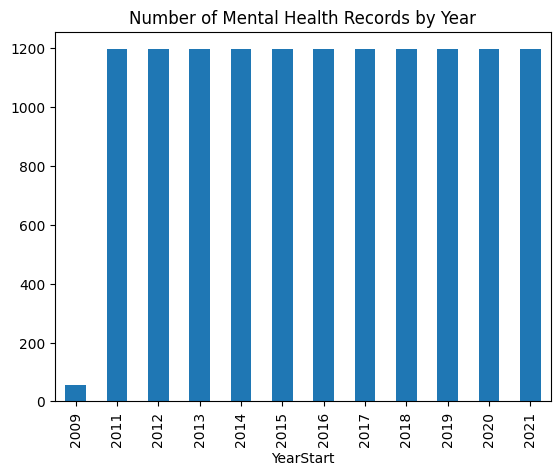

In [30]:
mental_health.groupby('YearStart').size().plot(kind='bar', title='Number of Mental Health Records by Year')

In [31]:
mental_health.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2018,2018,NV,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,NaN,%,Crude Prevalence,...,32,MTH,MTH2_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2020,2020,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,32,MTH,MTH1_0,MEAN,RACE,BLK,NaN,NaN,NaN,NaN
2,2018,2018,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,32,MTH,MTH1_0,MEAN,GENDER,GENF,NaN,NaN,NaN,NaN
3,2019,2019,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Age-adjusted Mean,...,32,MTH,MTH1_0,AGEADJMEAN,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2017,2017,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,NaN,Number,Mean,...,32,MTH,MTH1_0,MEAN,OVERALL,OVR,NaN,NaN,NaN,NaN


In [23]:
len(mental_health)

13200

In [24]:
mental_health.DataSource.value_counts()

DataSource
BRFSS    13145
PRAMS       55
Name: count, dtype: int64

In [13]:
mental_health.Question.value_counts()

Question
Recent mentally unhealthy days among adults aged >= 18 years               9570
At least 14 recent mentally unhealthy days among women aged 18-44 years    3575
Postpartum depressive symptoms                                               55
Name: count, dtype: int64

In [16]:
mental_health.YearStart.value_counts()

YearStart
2018    1195
2020    1195
2019    1195
2017    1195
2016    1195
2011    1195
2012    1195
2013    1195
2015    1195
2021    1195
2014    1195
2009      55
Name: count, dtype: int64

In [21]:
mental_health[mental_health.YearStart != mental_health.YearEnd]

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
40,2009,2011,US,United States,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,59,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
44,2009,2011,NV,Nevada,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,32,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
45,2009,2011,VA,Virginia,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,51,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
46,2009,2011,IN,Indiana,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,18,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
47,2009,2011,NH,New Hampshire,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,33,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
48,2009,2011,MS,Mississippi,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,28,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
49,2009,2011,FL,Florida,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,12,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
50,2009,2011,LA,Louisiana,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,22,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
51,2009,2011,SC,South Carolina,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,45,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
52,2009,2011,WA,Washington,PRAMS,Mental Health,Postpartum depressive symptoms,NaN,%,Crude Prevalence,...,53,MTH,MTH3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [14]:
alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')

/var/folders/7k/kt8nfzwd2pvgsvfsrs6vyjsm0000gn/T/ipykernel_4883/4228160081.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  alcohol = pd.read_csv('data/U.S._Chronic_Disease_Indicators__Alcohol_20240217.csv')


In [19]:
alcohol.Question.value_counts()

Question
Chronic liver disease mortality                                           13497
Binge drinking frequency among adults aged >= 18 years who binge drink     9570
Binge drinking intensity among adults aged >= 18 years who binge drink     9570
Binge drinking prevalence among adults aged >= 18 years                    9570
Heavy drinking among adults aged >= 18 years                               9570
Binge drinking prevalence among women aged 18-44 years                     3575
Heavy drinking among women aged 18-44 years                                3575
Alcohol use before pregnancy                                               2783
Alcohol use among youth                                                    1760
Binge drinking prevalence among youth                                       990
Per capita alcohol consumption among persons aged >= 14 years               330
Amount of alcohol excise tax by beverage type (beer)                        324
Amount of alcohol excise tax by

In [17]:
alcohol.YearStart.value_counts()

YearStart
2019    6810
2017    6706
2015    6362
2013    6124
2020    5985
2012    5839
2018    5768
2014    5718
2016    5684
2011    5467
2021    4346
2010    1282
Name: count, dtype: int64